In [1]:
"""
pytorch读取数据：Dataset、Dataloader
conda环境:wenet
"""
%matplotlib inline
import matplotlib.pyplot as plt
import torch
import os
from torch.utils.data import Dataset
from PIL import Image

/home/suncheng/anaconda3/envs/wenet/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
class MyDataset(Dataset):
    def __init__(self, root_dir, label_dir):
        self.root_dir = root_dir
        self.label_dir = label_dir
        self.path = os.path.join(self.root_dir, self.label_dir)
        self.img_path = os.listdir(self.path)
    
    def __getitem__(self, idx):
        img_name = self.img_path[idx]
        img_item_path = os.path.join(self.root_dir, self.label_dir, img_name)
        img = Image.open(img_item_path)
        label = self.label_dir
        return img, label
    
    def __len__(self):
        return len(self.img_path)

In [22]:
root_dir = 'data/hymenoptera_data/train'
ants_label_dir = 'ants'
bees_label_dir = 'bees'
ants_dataset = MyDataset(root_dir, ants_label_dir)
bees_dataset = MyDataset(root_dir, bees_label_dir)

train_dataset = ants_dataset + bees_dataset

# len(ants_dataset), len(bees_dataset), len(ants_dataset + bees_dataset)  # (124, 121, 245) 竟然可以直接相加拼接到一起

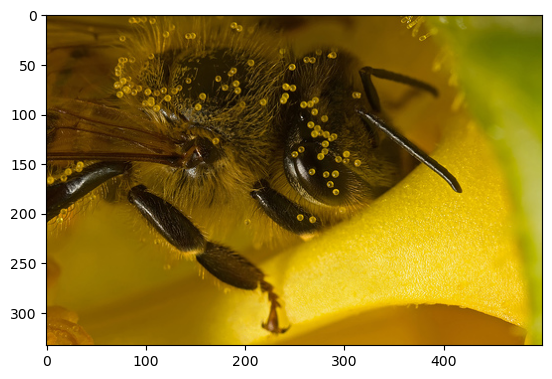

In [24]:
# jupyter显示PIL图像，使用matplotlib曲线救国一下吧
img, label = train_dataset[124]
plt.imshow(img)

In [33]:
""" 
tensorboard的使用 
    主要使用的2个方法：writer.add_image() writer.add_scalar()
    终端打开tensorboard命令是tensorboard --logdir=logs. 为防止多人访问服务器节点，可以指定端口号--port=xxx
"""
from torch.utils.tensorboard import SummaryWriter
import numpy as np
from PIL import Image

writer = SummaryWriter(log_dir='logs')

# add_scalar()的使用
# for i in range(100):
#     # writer.add_scalar("function y=x", i, i)
#     writer.add_scalar('function y=2x', 2 * i, i)    # tag可以理解为一个唯一的标记，Tensorboard会自动拟合数据，看起来更平滑。如果写错了数据可能就是乱七八糟的，因为也会自动拟合
# writer.close()

# add_image()的使用
image_path = 'data/hymenoptera_data/val/bees/1032546534_06907fe3b3.jpg'
img_PIL = Image.open(image_path)    # 转为ndarray后是 H W C
img_array = np.asarray(img_PIL)     # H W C
# img_array.shape
writer.add_image('add image', img_array, 1, dataformats='HWC')  # 根据global_step可以写入多张图片。效果仅仅是Tensorboard中显示图片而已

In [1]:
""" transforms的使用 """
from torchvision import transforms
from PIL import Image
from torch.utils.tensorboard import SummaryWriter

# tensor数据类型
image_path = 'data/hymenoptera_data/val/bees/1032546534_06907fe3b3.jpg'
imgPIL = Image.open(image_path)
print(imgPIL)   # <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=366x500 at 0x7FB209162580>

trans = transforms.ToTensor()
imgTensor = trans(imgPIL)
print(imgTensor), print(imgTensor.shape)  # C H W

# 为什么需要tensor--转为统一格式进pytorch模型训练
writer = SummaryWriter('logs')
writer.add_image('Tensor_image', imgTensor)
writer.close()

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=366x500 at 0x7F4F0FAA20A0>
tensor([[[0.2588, 0.2706, 0.2549,  ..., 0.5294, 0.4745, 0.4118],
         [0.2510, 0.2706, 0.2706,  ..., 0.5137, 0.4706, 0.4392],
         [0.2353, 0.2510, 0.2627,  ..., 0.5255, 0.4941, 0.4745],
         ...,
         [0.4941, 0.4863, 0.4980,  ..., 0.3216, 0.1451, 0.0627],
         [0.4824, 0.4745, 0.4706,  ..., 0.2902, 0.1373, 0.0667],
         [0.4314, 0.4314, 0.4314,  ..., 0.2196, 0.1137, 0.0980]],

        [[0.1333, 0.1451, 0.1373,  ..., 0.5333, 0.4784, 0.4196],
         [0.1451, 0.1647, 0.1608,  ..., 0.5216, 0.4745, 0.4431],
         [0.1647, 0.1804, 0.1843,  ..., 0.5333, 0.4941, 0.4667],
         ...,
         [0.5647, 0.5451, 0.5490,  ..., 0.3255, 0.1608, 0.0824],
         [0.5608, 0.5451, 0.5373,  ..., 0.3020, 0.1608, 0.0941],
         [0.5373, 0.5294, 0.5373,  ..., 0.2471, 0.1490, 0.1333]],

        [[0.0824, 0.1020, 0.1059,  ..., 0.6118, 0.5490, 0.4784],
         [0.1098, 0.1373, 0.1451,  ..., 0